In [1]:
import pandas as pn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.metrics import confusion_matrix
import itertools
import os
import cv2
import numpy as np
import tensorflow as tf
import pandas as pd
import glob
from matplotlib import pyplot as plt
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
!pip install plotly
import plotly
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from sklearn.manifold import TSNE

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!unzip /content/drive/MyDrive/Dataset.zip

Archive:  /content/drive/MyDrive/Dataset.zip
replace Dataset/test_set/A/1.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [4]:
#training and testing datagenerator
train_data=ImageDataGenerator(rescale=1./255,zoom_range=0.2,shear_range=0.2,horizontal_flip=True,validation_split=0.2)
test_data=ImageDataGenerator(rescale=1./255)

In [5]:
x_train=train_data.flow_from_directory('/content/Dataset/training_set',target_size=(64,64),class_mode='categorical',batch_size=100)
x_test=test_data.flow_from_directory('/content/Dataset/test_set',target_size=(64,64),class_mode='categorical',batch_size=100,shuffle=False)
validation_generator = train_data.flow_from_directory(
    '/content/Dataset/training_set', # same directory as training data
    target_size=(64, 64),
    batch_size=100,
    class_mode='categorical',
    subset='validation')

Found 15750 images belonging to 9 classes.
Found 2250 images belonging to 9 classes.
Found 3150 images belonging to 9 classes.


In [6]:
print(len(x_train))
print(len(x_test))

158
23


In [7]:
x_train.class_indices

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8}

In [8]:
path = '/content/Dataset/training_set'

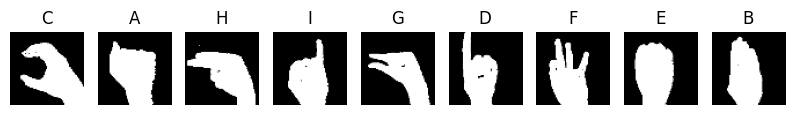

In [9]:
fig, ax = plt.subplots(1, 9, figsize=(10, 5))

img_classes = [os.path.join(path, im) for im in os.listdir(path)]

ax = ax.flatten()

for i, img_class in enumerate(img_classes):
    img = os.listdir(img_class)[np.random.randint(0, 10)]
    img_path = os.path.join(img_class, img)
    image = cv2.imread(img_path)
    ax[i].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    ax[i].set_title(os.path.basename(img_class))
    ax[i].axis('off')

plt.show()

In [10]:
from keras.models import load_model, Model

In [11]:
path = '/content/Dataset/test_set'

In [12]:
img_classes = [os.path.join(path, im) for im in os.listdir(path)]


In [13]:
img_classes.sort()
img_classes

['/content/Dataset/test_set/A',
 '/content/Dataset/test_set/B',
 '/content/Dataset/test_set/C',
 '/content/Dataset/test_set/D',
 '/content/Dataset/test_set/E',
 '/content/Dataset/test_set/F',
 '/content/Dataset/test_set/G',
 '/content/Dataset/test_set/H',
 '/content/Dataset/test_set/I']

### MODEL

In [14]:
from keras.applications import VGG16;
from keras.applications.vgg16 import preprocess_input

In [15]:
model=Sequential()
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(64,64,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())

# Adding Hidden Layers
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))

# Adding Output Layer
model.add(Dense(9,activation='softmax'))


In [16]:



model.compile(optimizer='adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 30752)             0         
                                                                 
 dense (Dense)               (None, 256)               7872768   
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 9)                 1161      
                                                        

In [17]:
class callbacks(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epochs,logs={}):
        if(logs.get('val_accuracy')>0.99):
            self.model.stop_training=True

In [18]:

callback = callbacks()


In [19]:
history=model.fit_generator(
        x_train,
        steps_per_epoch=len(x_train),
        epochs=10,
        validation_data = validation_generator,
    validation_steps = len(validation_generator),
        callbacks=callback

)

<ipython-input-19-14758fdefc2d>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(


Epoch 1/10
158/158 [==============================] - 44s 219ms/step - loss: 0.3071 - accuracy: 0.9018 - val_loss: 0.0566 - val_accuracy: 0.9857
Epoch 2/10
158/158 [==============================] - 30s 191ms/step - loss: 0.0382 - accuracy: 0.9884 - val_loss: 0.0188 - val_accuracy: 0.9959


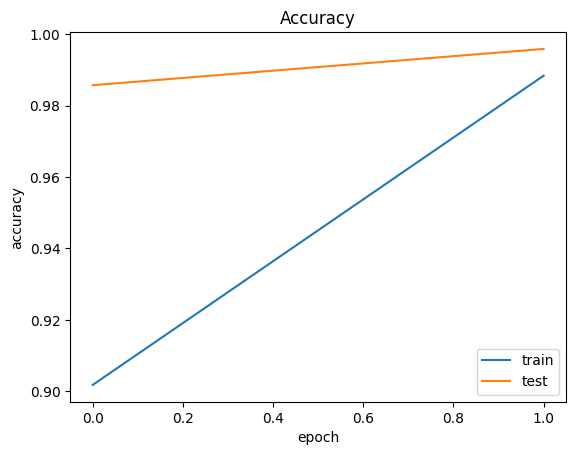

In [20]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])
plt.show()

In [21]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [22]:
model.save('model1.h5')

In [120]:
img=image.load_img('/content/Dataset/test_set/G/10.png',
                   target_size=(64,64))

In [121]:
x=image.img_to_array(img)

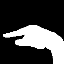

In [122]:


img



In [123]:
x=np.expand_dims(x,axis=0)
pred=np.argmax(model.predict(x),axis=1)




1/1 [==============================] - 0s 27ms/step


In [124]:
pred

array([6])

In [125]:
index=['A','B','C','D','E','F','G','H','I']
print(index[pred[0]])

G


In [83]:
img_classes = [os.path.join(path, im) for im in os.listdir(path)]
img_classes

['/content/Dataset/test_set/C',
 '/content/Dataset/test_set/A',
 '/content/Dataset/test_set/H',
 '/content/Dataset/test_set/I',
 '/content/Dataset/test_set/G',
 '/content/Dataset/test_set/D',
 '/content/Dataset/test_set/F',
 '/content/Dataset/test_set/E',
 '/content/Dataset/test_set/B']

In [48]:
print(x_test.classes)

[0 0 0 ... 8 8 8]


In [49]:
pred=model.predict(x_test)

23/23 [==============================] - 2s 87ms/step


In [50]:
model.evaluate(x_test)

23/23 [==============================] - 3s 139ms/step - loss: 0.2742 - accuracy: 0.9747


[0.2742185592651367, 0.9746666550636292]

In [51]:
y_true=x_test.classes[x_test.index_array]

In [52]:
y_true

array([0, 0, 0, ..., 8, 8, 8], dtype=int32)

In [53]:
pred.argmax(axis=1)

array([0, 0, 0, ..., 8, 8, 8])

In [54]:
import sklearn

In [55]:
cm=sklearn.metrics.confusion_matrix(y_true,pred.argmax(axis=1))

In [56]:
cm

array([[250,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 250,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 249,   1,   0,   0,   0,   0,   0],
       [  0,   0,   0, 250,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 249,   0,   0,   0,   1],
       [  0,   0,   0,   0,   0, 250,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 246,   4,   0],
       [  0,   0,   0,   0,   0,   0,  50, 200,   0],
       [  0,   0,   0,   0,   0,   1,   0,   0, 249]])

In [57]:
list((x_test.class_indices.keys()))

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']

In [58]:
fig = go.Figure()

# Heatmap
fig.add_trace(
    go.Heatmap(
        z=cm[::-1],
        x=list((x_test.class_indices.keys())),
        y=list((x_test.class_indices.keys()))[::-1],
        text=cm[::-1],
        texttemplate="<b>%{text}</b>",
        textfont={"size":8},
        colorscale=[[0, '#f4f4f4'],[1.0, '#76503d']],
        showscale = False,
        ygap = 5,
        xgap = 5,
        hovertemplate=
        '''
        Actual: %{y}<br>
        Predicted: %{x}<br>
        Total: %{text}
        ''',
        name="Confusion Matrix"
    )
)

# Update Axes
fig.update_xaxes(title="<b>Predicted Values</b>", tickfont_size=10)
fig.update_yaxes(title="<b>Actual Values</b>", tickfont_size=10)

# Update Layout
fig.update_layout(title_text='Confusion Matrix', title_x=0.5, font_size=14,
                  width=1050,
                  height=1115,
                  plot_bgcolor='white',
                  showlegend=False,
)

# Show
fig.show()

In [41]:
from sklearn.metrics import classification_report
import numpy as np

labels = np.array(list((x_test.class_indices.keys())))


print(classification_report(y_true,pred.argmax(axis=1), target_names=labels))

              precision    recall  f1-score   support

           A       1.00      1.00      1.00       250
           B       1.00      1.00      1.00       250
           C       1.00      1.00      1.00       250
           D       1.00      1.00      1.00       250
           E       1.00      1.00      1.00       250
           F       1.00      1.00      1.00       250
           G       0.83      0.98      0.90       250
           H       0.98      0.80      0.88       250
           I       1.00      1.00      1.00       250

    accuracy                           0.97      2250
   macro avg       0.98      0.97      0.97      2250
weighted avg       0.98      0.97      0.97      2250

